In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
class UCBMultiArmedBandit:
    def __init__(self, arms):
        self.arms = arms
        self.num_arms = len(arms)
        self.num_iterations = len(arms[0])
        self.action_counts = [0] * self.num_arms
        self.total_rewards = [0] * self.num_arms
        self.Q_values = [0] * self.num_arms

    def select_arm(self, iteration):
        # Select arm using Upper Confidence Bound (UCB) algorithm
        ucb_values = [0] * self.num_arms
        total_iterations = np.sum(self.action_counts)

        for arm in range(self.num_arms):
            if self.action_counts[arm] == 0:
                return arm
            else:
                exploration_term = np.sqrt(2 * np.log(total_iterations) / self.action_counts[arm])
                ucb_values[arm] = self.Q_values[arm] + exploration_term

        return np.argmax(ucb_values)

    def update(self, chosen_arm, reward):
        self.action_counts[chosen_arm] += 1
        self.total_rewards[chosen_arm] = reward
        self.Q_values[chosen_arm] = self.total_rewards[chosen_arm]

def reward_function(vector1, vector2, itr):
    if len(vector1) != len(vector2):
        raise ValueError("Vectors must be of the same length")

    difference = np.subtract(vector1[:itr], vector2[:itr])
    sum_of_squares = np.sum(np.square(difference))
    reward = 1 / np.sqrt(sum_of_squares)
    return reward

# Load vectors from CSV

In [2]:
vectors = pd.read_csv('C:/Users/CHARAN SRI SAI/Downloads/rsjbrproj/con_resume1.csv')
# List of column name

In [3]:
job_data = pd.read_csv('C:/Users/CHARAN SRI SAI/Downloads/rsjbrproj/con_job.csv')

In [27]:
x=237
columns = ['vec_' + str(i) for i in range(1, 21)]

# Extract columns from row 13 (label 12)
job_vector = job_data.loc[x, columns]
job_title = job_data.loc[x,'jobtitle']
job_vector=job_vector.values
job_title

'android developer'

In [28]:
resume = pd.read_csv('C:/users/CHARAN SRI SAI/Downloads/rsjbrproj/data_gathering_eda/resume_sorted_final3.csv')
unique_title = resume['Resume_title'].unique().tolist()
unique_title.sort()
from fuzzywuzzy import process, fuzz
title_score_sort = [(job_title,) + i 
             for i in process.extract(job_title, unique_title, scorer=fuzz.token_sort_ratio,limit=10)]
#Create a dataframe from the tuples
title_similarity_sort = pd.DataFrame(title_score_sort, columns=['title_orinigal','title_checked','title_score_sort'])



In [29]:
titles_to_check = title_similarity_sort['title_checked'].str.lower().unique()
filtered_resume = vectors[vectors['Resume_title'].str.lower().isin(titles_to_check)]

In [30]:
columns = ['vec_' + str(i) for i in range(1, 21)]
filtered_vectors = filtered_resume.loc[:, columns]

In [31]:
filtered_vectors

,vec_1,vec_2,vec_3,vec_4,vec_5,vec_6,vec_7,vec_8,vec_9,vec_10,vec_11,vec_12,vec_13,vec_14,vec_15,vec_16,vec_17,vec_18,vec_19,vec_20
1633,-1.113646,0.835111,-1.348395,2.593832,-1.730906,-1.004932,1.157230,1.153261,0.729732,-2.793983,0.927978,2.658105,1.854944,1.851987,-0.288272,1.642381,1.485079,1.792031,-0.137341,-0.825075
1646,-0.629791,-0.212327,-1.107212,1.606067,-3.500792,-1.519147,1.339394,2.398887,0.798291,-3.464327,1.484027,1.279628,2.696369,2.086176,-0.966395,1.688752,-0.108519,1.540940,-0.418881,-0.244902
1962,-4.561677,0.476483,0.114712,0.018778,-0.944296,-1.568930,0.967885,0.464040,-2.377636,2.541694,3.176213,-1.661445,5.539749,5.433226,0.223302,1.936234,3.062616,-2.782224,-0.139498,-1.568600
2294,-2.676246,-0.395275,0.300260,-1.365975,-1.777914,1.117626,1.146309,1.081555,1.127684,-0.391783,-0.502616,-0.593843,1.596902,0.070932,0.392115,0.234714,2.689821,-2.086370,1.493322,-0.712161
2464,1.741522,-0.838303,0.183697,2.587770,-1.964464,-1.168068,0.197125,-0.518476,-1.970453,-1.675029,0.334369,-0.482054,-0.282101,2.430669,1.176419,1.689775,1.451870,-0.757699,-1.088458,-0.383474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13767,0.013348,0.111656,-0.436701,1.200663,-3.231529,-3.680146,-0.037738,0.777539,-1.235127,-1.358415,-1.563095,0.219010,1.193225,0.877497,-0.304730,1.130493,-0.670852,-3.080904,-0.922463,0.521858
13779,-0.707084,1.291884,-0.026321,0.486555,-0.620320,-0.598183,2.213713,1.340423,0.569691,-1.395764,1.426158,1.462908,2.145010,-0.444113,-0.161283,2.936817,1.960957,1.684097,-0.032199,0.927679
13798,-1.936934,1.207422,-0.525881,-0.831302,-1.818106,0.734393,0.641637,1.502973,0.036944,-0.828242,0.163232,0.974364,1.202479,1.748014,0.294503,1.618183,2.390805,-1.244343,1.263249,-1.034733
13803,-0.574361,1.167717,-0.045190,-2.047375,-2.486950,-1.692032,0.034153,1.793901,1.290566,-0.749010,2.023282,0.379180,0.224788,-0.555892,-0.145492,0.649953,0.661742,0.740774,-1.444813,-1.796407


In [32]:
filtered_array = filtered_vectors.values

In [33]:
bandit = UCBMultiArmedBandit(filtered_array)
rewards=[]

for i in range(bandit.num_iterations * filtered_array.shape[0]):
    chosen_arm = bandit.select_arm(i)
    reward = reward_function(filtered_array[chosen_arm], job_vector, bandit.action_counts[chosen_arm] + 1)  # Incrementing the iteration count by 1
    rewards.append(reward)
    bandit.update(chosen_arm, reward)

bestres=np.argmax(bandit.Q_values) 

In [35]:
bestres
best_res_ind=filtered_vectors.index[bestres]
sorted_resumes = sorted(enumerate(bandit.Q_values), key=lambda x: x[1], reverse=True)

# Extract top 10 indexes
top_10_indexes = [index for index, _ in sorted_resumes[:20]]

best_resumes_ind = []
for i in range(len(top_10_indexes)):
    best_resumes_ind.append(filtered_vectors.index[top_10_indexes[i]])

#for i in range(len(best_resumes_ind)):
filtered_rows = filtered_resume[filtered_resume.index.isin(best_resumes_ind)]
    
print(filtered_rows)




       index       Resume_title         City  location  \
2796    2796  android developer    Bengaluru        16   
2802    2802  android developer    Bengaluru        16   
3220    3220  android developer        Delhi         9   
3288    3288  android developer       Karnal        12   
3459    3459  android developer        Surat        11   
3517    3517  android developer        Surat        11   
5462    5462  android developer     Bilaspur         6   
7636    7636  android developer         Pune        20   
8124    8124  android developer         Pune        20   
8129    8129  android developer    Mangalore        16   
8262    8262  android developer      Gurgaon        12   
13499  13499  android developer         NONE         1   
13514  13514  android developer    New Delhi         9   
13553  13553  android developer     Bilaspur         6   
13586  13586  android developer         Pune        20   
13592  13592  android developer    Mangalore        16   
13610  13610  

In [38]:
def calculate_regret(rewards, optimal_reward):
    cumulative_reward = np.cumsum(rewards)
    cumulative_optimal_reward = np.arange(1, len(rewards) + 1) * optimal_reward
    regret = cumulative_optimal_reward - cumulative_reward
    return regret

In [39]:
optimal_reward = bandit.Q_values[bestres]
regret=calculate_regret(rewards,optimal_reward)

In [22]:
print("Regret:")
np.set_printoptions(threshold=np.inf)
print(len(regret))

Regret:
26920


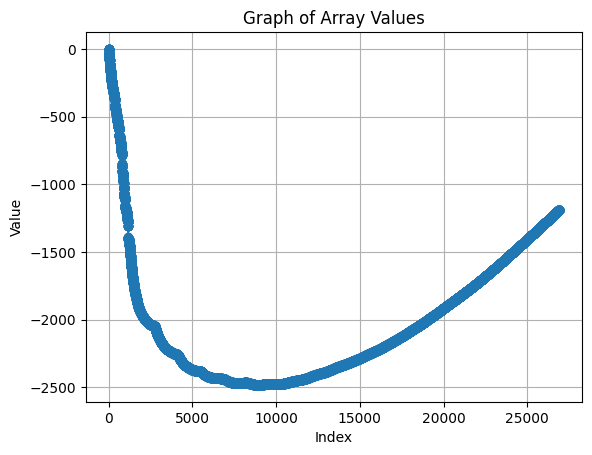

In [23]:
import matplotlib.pyplot as plt
x = range(len(regret))

# Plotting
plt.plot(x, regret, marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Graph of Array Values')
plt.grid(True)
plt.show()

#Accuracy for php developer

In [15]:
filtered_jobs = job_data[job_data['jobtitle'].str.lower().isin(titles_to_check)]
columns = ['vec_' + str(i) for i in range(1, 21)]
filtered_vec_jobs = filtered_jobs.loc[:, columns]
filtered_vec_jobs_vals=filtered_vec_jobs.values
filtered_vec_jobs_vals2=filtered_vec_jobs_vals[:5]

In [16]:
rewards_all=[]
best_res=[]
for j in range(len(filtered_vec_jobs_vals2)):
    bandit = UCBMultiArmedBandit(filtered_array)
    rewards=[]
    for i in range(bandit.num_iterations * filtered_array.shape[0]):
        chosen_arm = bandit.select_arm(i)
        reward = reward_function(filtered_array[chosen_arm], filtered_vec_jobs_vals[j], bandit.action_counts[chosen_arm] + 1)  # Incrementing the iteration count by 1
        rewards.append(reward)
        bandit.update(chosen_arm, reward)

    bestres=np.argmax(bandit.Q_values)
    best_res.append(bestres)
    rewards_all.append(rewards)
    
     

KeyboardInterrupt: 

In [ ]:
cos_sim=0
for i in range(len(best_res)):
    cos_sim=cos_sim+cosine_similarity(filtered_array[best_res[i]],filtered_vec_jobs_vals2[i])[0][0]

cos_sim=cos_sim/25
cos_sim

In [ ]:
len(best_res)

25